#                           Voice-Based Cognitive Decline Pattern Detection

Cognitive stress refers to the mental strain and emotional burden experienced due to excessive thinking, worry, or difficulty with mental processes.

 Cognitive decline indicators, on the other hand, are signs that someone's mental abilities are worsening. These include memory loss, difficulty concentrating, problems with language, and changes in thinking and problem-solving skills.

In [ ]:
!pip install librosa soundfile numpy pandas matplotlib seaborn scikit-learn SpeechRecognition pydub python-speech-features transformers torch

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.9/32.9 MB 27.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 20.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 797.7 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 65.3 MB/s eta 0:00:00
  Created wheel for python-speech-features: filename=python_speech_features-0.6-py

In [ ]:
!pip install git+https://github.com/openai/whisper.git
!pip install torch torchaudio

  Cloning https://github.com/openai/whisper.git to /tmp/pip-req-build-1jktt8_f
  Running command git clone --filter=blob:none --quiet https://github.com/openai/whisper.git /tmp/pip-req-build-1jktt8_f
  Resolved https://github.com/openai/whisper.git to commit 517a43ecd132a2089d85f4ebc044728a71d49f6e
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 20.2 MB/s eta 0:00:00
  Created wheel for openai-whisper: filename=openai_whisper-20240930-py3-none-any.whl size=803707 sha256=d56c803025294044ad643e89ad7f2a7a247342c119180d24ef6de9e28090b468
  Stored in directory: /tmp/pip-ephem-wheel-cache-sf6edf0_/wheels/1f/1d/98/9583695e6695a6ac0ad42d87511097dce5ba486647dbfecb0e
Successfully built openai-whisper


# PROCESSING AND LOADING

Successfully loaded 10 audio files



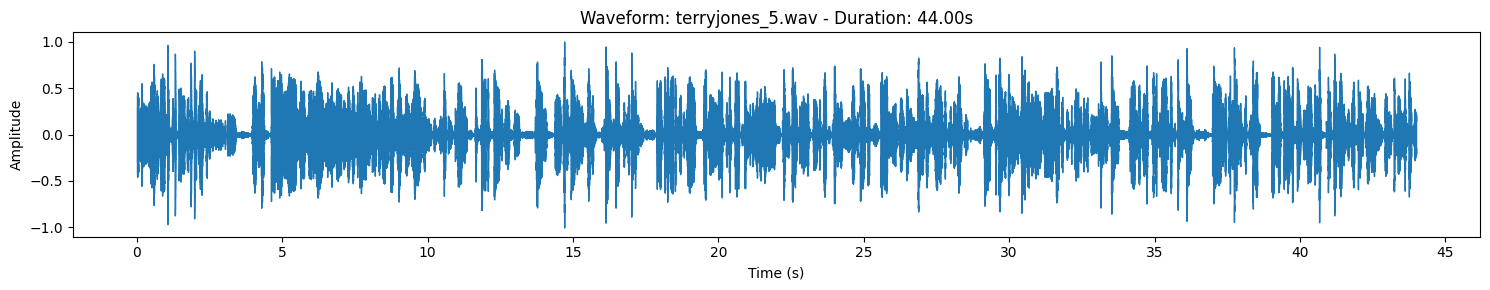

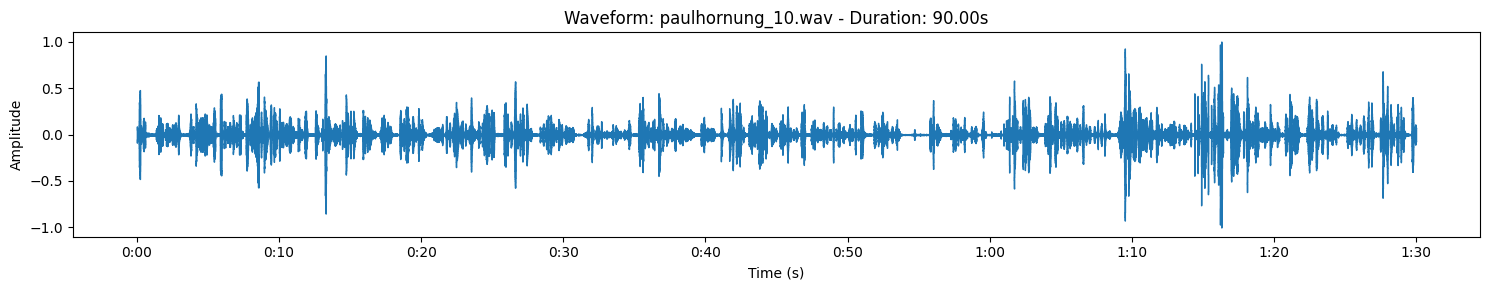

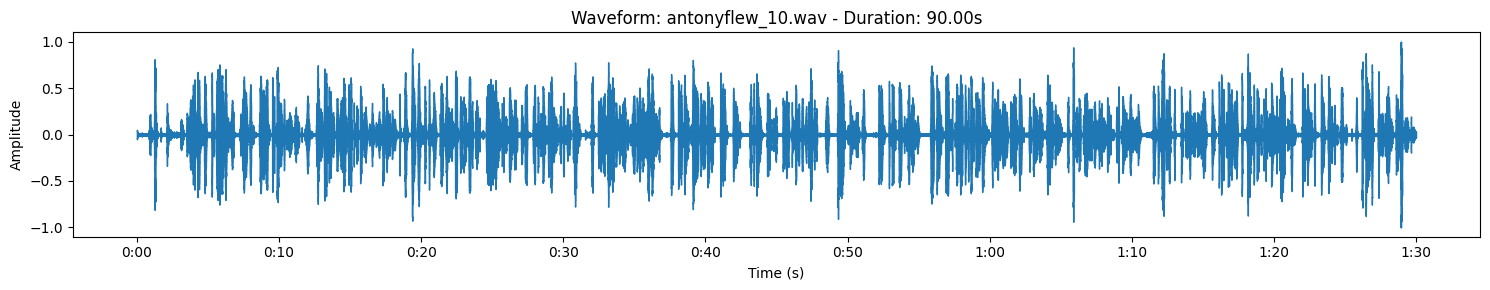

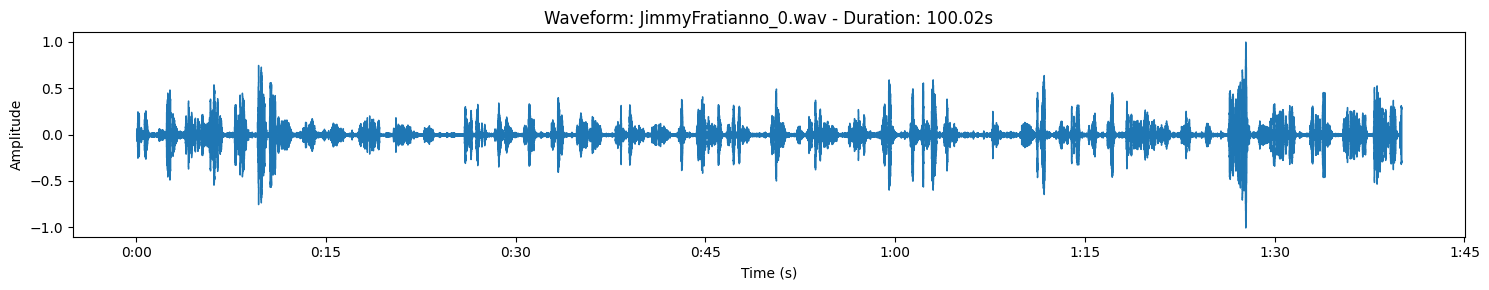

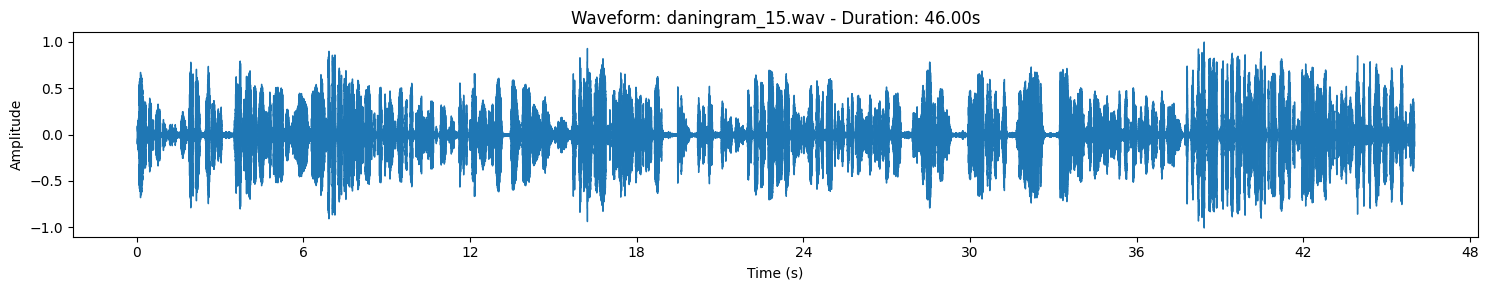

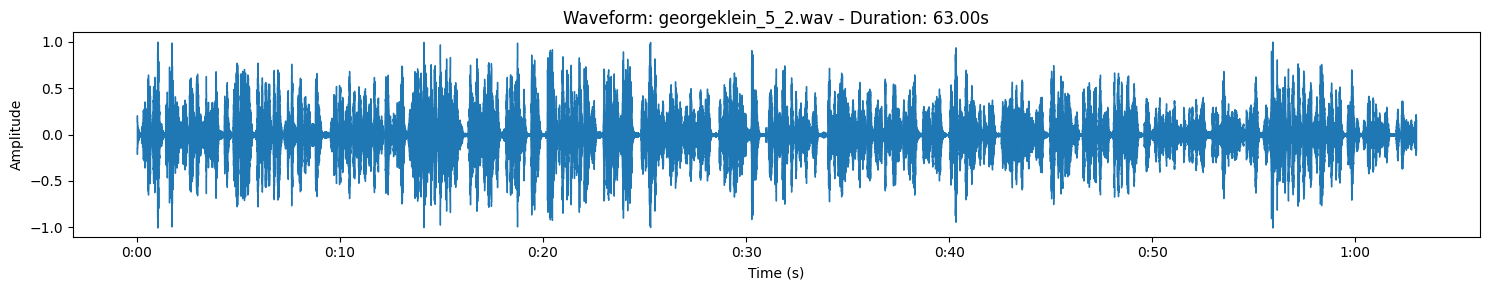

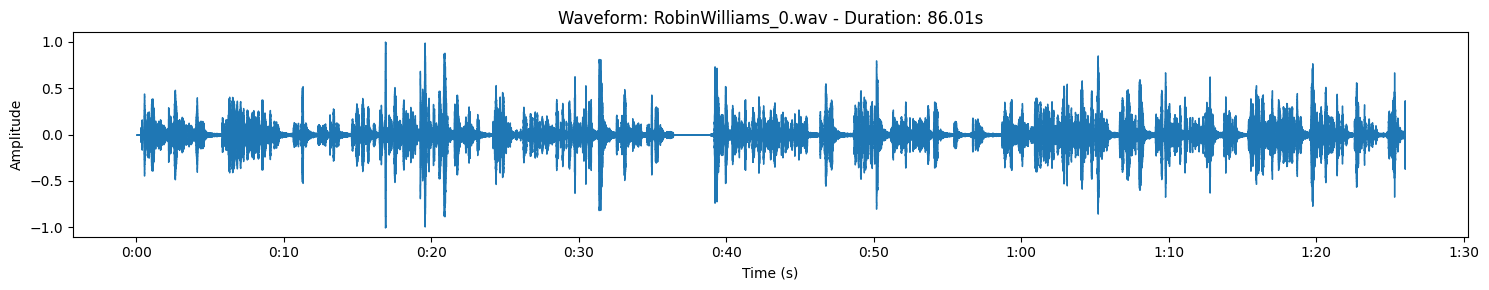

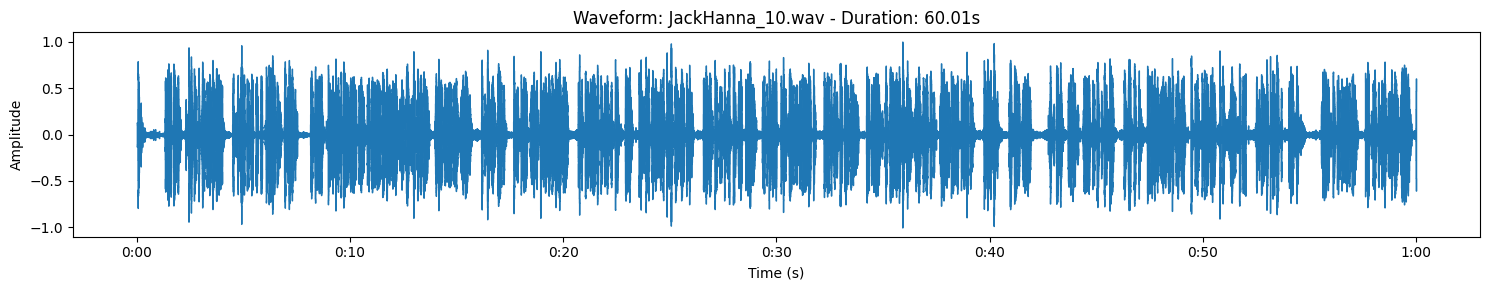

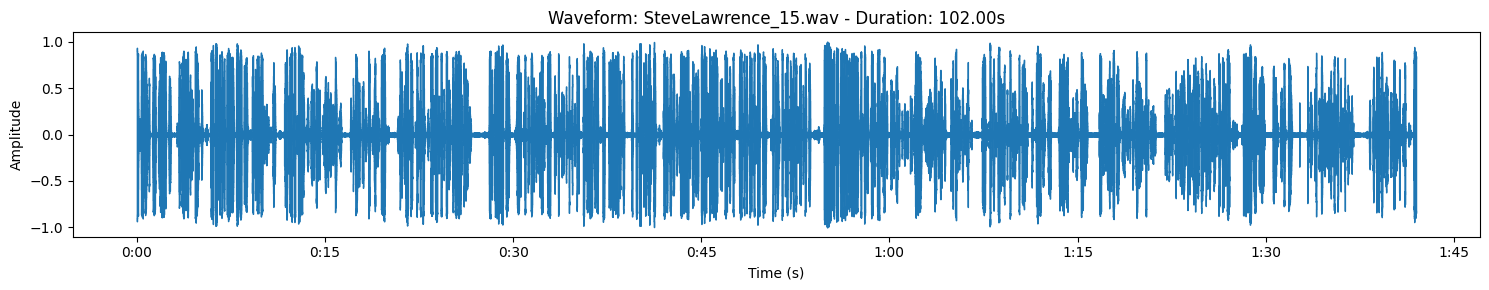

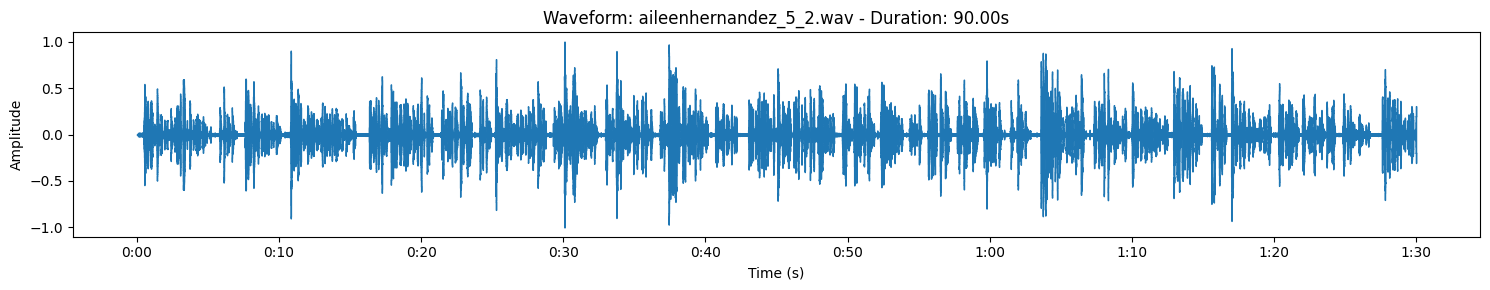

In [ ]:
import os
import librosa
import librosa.display
import soundfile as sf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pydub import AudioSegment

# Folder with audio files
audio_folder = "/content/sample_data/audio"
sample_rate = 16000  # Standard sample rate for speech processing

def load_and_preprocess_audio(audio_path, target_sr=sample_rate):
    try:
        # Load audio
        audio, sr = librosa.load(audio_path, sr=target_sr)

        # Normalize audio
        audio = librosa.util.normalize(audio)

        return audio, sr
    except Exception as e:
        print(f"Error processing {audio_path}: {str(e)}")
        return None, None

# Load audio files
audio_files = [f for f in os.listdir(audio_folder) if f.endswith('.wav') or f.endswith('.mp3')]
audio_data = []

for file in audio_files[:10]:  # First 10 files
    file_path = os.path.join(audio_folder, file)
    audio, sr = load_and_preprocess_audio(file_path)
    if audio is not None:
        audio_data.append({
            'filename': file,
            'audio': audio,
            'sample_rate': sr
        })

print(f"Successfully loaded {len(audio_data)} audio files\n")

# Plot waveforms
for item in audio_data:
    audio = item['audio']
    sr = item['sample_rate']
    filename = item['filename']
    duration = len(audio) / sr

    plt.figure(figsize=(15, 3))
    librosa.display.waveshow(audio, sr=sr)
    plt.title(f"Waveform: {filename} - Duration: {duration:.2f}s")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.tight_layout()
    plt.show()


# CONVERTING AUDIO TO TEXT


In [ ]:
import whisper
import os

# Load Whisper model
model = whisper.load_model("base")

# Folder containing processed audio
AUDIO_FOLDER = "/content/sample_data/audio"
file_list = sorted([f for f in os.listdir(audio_folder) if f.endswith(".wav")])[:10]  # Get first 10

# Transcribe and print results
transcriptions = {}


for file in file_list:
    path = os.path.join(audio_folder, file)
    result = model.transcribe(path)
    transcriptions[file] = result['text']

# Print all transcriptions
for i, (filename, text) in enumerate(transcriptions.items(), start=1):
    print(f"\n Audio {i}: {filename}")
    print(f" Transcription: {text}")

100%|███████████████████████████████████████| 139M/139M [00:02<00:00, 59.1MiB/s]
/usr/local/lib/python3.11/dist-packages/whisper/transcribe.py:132: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")
/usr/local/lib/python3.11/dist-packages/whisper/transcribe.py:132: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")
/usr/local/lib/python3.11/dist-packages/whisper/transcribe.py:132: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")
/usr/local/lib/python3.11/dist-packages/whisper/transcribe.py:132: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")
/usr/local/lib/python3.11/dist-packages/whisper/transcribe.py:132: UserWarning: FP16 is not supported on CPU; using FP32 instead
  


 Audio 1: JackHanna_10.wav
 Transcription:  The Hannah family, the Columbus Zoo, Cincinnati Zoo, the zoo world, this is obviously a terrible tragedy, but however, we have given over tens of millions of dollars over the last years to the gorilla world, both lowly and in mountain gorillas. I happen to have a home three miles where the gorillas live in Rwanda. That's the mountain gorillas. However, what you see here, you hear the screaming going, I hear it right now, you hear the screaming going, I'll watch that gorillas response by the way. He doesn't know what's going on. This is a silverback probably, not a female. He hears the response, you can see from the face in the mouth, he's alarmed. Yes, he goes over and looks at the little child there. They know that about that. What happens when you tranquilize the animal, whether it's a gorilla, whatever animal it might be? There's a new researcher in the wild with gorillas, I've seen what happens, so I know what happens. When that dark hit

#  Extracting relevant features

In [22]:
import re
import numpy as np
import pandas as pd
import librosa
from IPython.display import display, HTML

# Clean the dataframe first - remove any NaN rows
df_features = pd.DataFrame({
    'filename': list(transcriptions.keys()),
    'text': list(transcriptions.values())
})


# New precise hesitation pattern
HESITATION_PATTERN = re.compile(
    r'(?:^|\s)(uh+|um+|ah+|er+|eh+|uh-uh|um-um)(?:\s|\.\.\.|…|,|$)|\.\.\.|…',
    flags=re.IGNORECASE
)

# New function to count REAL hesitations
def count_real_hesitations(text):
    matches = HESITATION_PATTERN.finditer(text.lower())
    count = 0
    found = []
    for match in matches:
        # Only count if it's a standalone hesitation
        if match.group().strip() in ['uh', 'um', 'ah', 'er', 'eh', '...', '…'] or \
           any(filler in match.group() for filler in ['uh', 'um', 'ah', 'er', 'eh']):
            count += 1
            found.append(match.group())
    return count, found

# New audio processing with better parameters
def process_audio_pauses(audio, sr):
    # Remove background noise first
    audio_clean = librosa.effects.preemphasis(audio)

    # More accurate silence detection
    non_silent = librosa.effects.split(
        audio_clean,
        top_db=30,        # More sensitive threshold
        frame_length=1024, # Better for speech
        hop_length=256,
        ref=np.mean
    )

    # Calculate pauses between words
    pause_threshold = 0.2  # 200ms minimum for a meaningful pause
    pause_count = 0
    pause_durations = []

    for i in range(len(non_silent)-1):
        pause_len = (non_silent[i+1][0] - non_silent[i][1]) / sr
        if pause_len > pause_threshold:
            pause_count += 1
            pause_durations.append(pause_len)

    return pause_count, pause_durations

# Reprocess ALL features with the new methods
for idx, row in df_features.iterrows():
    audio_info = next(item for item in audio_data if item['filename'] == row['filename'])
    audio = audio_info['audio']
    sr = audio_info['sample_rate']
    text = row['text']

    # Get accurate hesitation count
    hes_count, found_fillers = count_real_hesitations(text)
    word_count = len(re.findall(r'\b\w+\b', text.lower()))

    # Get accurate pause information
    pause_count, pause_durs = process_audio_pauses(audio, sr)
    total_pause = sum(pause_durs) if pause_durs else 0
    avg_pause = np.mean(pause_durs) if pause_durs else 0
    audio_dur = len(audio)/sr

    # Update the dataframe
    df_features.at[idx, 'hesitation_count'] = hes_count
    df_features.at[idx, 'pause_count'] = pause_count
    df_features.at[idx, 'filler_word_ratio'] = hes_count/word_count if word_count > 0 else 0
    df_features.at[idx, 'pause_duration_ratio'] = total_pause/audio_dur if audio_dur > 0 else 0
    df_features.at[idx, 'avg_pause_length'] = avg_pause

    # For debugging - show what was actually found
    print(f"\nFile: {row['filename']}")
    print(f"Hesitations found: {found_fillers}")
    print(f"Total hesitations: {hes_count}")
    print(f"Pauses detected: {pause_count} (avg duration: {avg_pause:.2f}s)")

# Display final corrected results
print("\nFINAL CORRECTED RESULTS:")
display(HTML(df_features[['filename', 'hesitation_count', 'pause_count', 'filler_word_ratio']].to_html()))

# Verification function - show text with highlighted hesitations
def show_hesitations(filename):
    text = df_features[df_features['filename'] == filename]['text'].values[0]
    highlighted = HESITATION_PATTERN.sub(
        lambda m: f"<span style='color:red;font-weight:bold'>{m.group()}</span>",
        text
    )
    display(HTML(f"<h3>{filename}</h3><div style='border:1px solid #ccc;padding:10px'>{highlighted}</div>"))

# Let's verify SteveLawrence_15.wav which had issues
show_hesitations("SteveLawrence_15.wav")


File: JackHanna_10.wav
Hesitations found: []
Total hesitations: 0
Pauses detected: 0 (avg duration: 0.00s)

File: JimmyFratianno_0.wav
Hesitations found: ['...']
Total hesitations: 1
Pauses detected: 0 (avg duration: 0.00s)

File: RobinWilliams_0.wav
Hesitations found: ['...']
Total hesitations: 1
Pauses detected: 1 (avg duration: 2.50s)

File: SteveLawrence_15.wav
Hesitations found: [' uh...', ' uh...', ' uh...', ' uh...', ' uh...', ' uh...', ' uh...', ' uh...', ' uh...', ' uh...', ' uh...', ' uh...', ' uh...', ' uh...', ' uh...', ' uh...', ' uh...', ' uh...']
Total hesitations: 18
Pauses detected: 16 (avg duration: 0.41s)

File: aileenhernandez_5_2.wav
Hesitations found: []
Total hesitations: 0
Pauses detected: 0 (avg duration: 0.00s)

File: antonyflew_10.wav
Hesitations found: []
Total hesitations: 0
Pauses detected: 0 (avg duration: 0.00s)

File: daningram_15.wav
Hesitations found: ['...']
Total hesitations: 1
Pauses detected: 0 (avg duration: 0.00s)

File: georgeklein_5_2.wav
Hes

,filename,hesitation_count,pause_count,filler_word_ratio
0,JackHanna_10.wav,0.0,0.0,0.000000
1,JimmyFratianno_0.wav,1.0,0.0,0.004367
2,RobinWilliams_0.wav,1.0,1.0,0.003717
3,SteveLawrence_15.wav,18.0,16.0,0.050992
4,aileenhernandez_5_2.wav,0.0,0.0,0.000000
5,antonyflew_10.wav,0.0,0.0,0.000000
6,daningram_15.wav,1.0,0.0,0.007092
7,georgeklein_5_2.wav,0.0,0.0,0.000000
8,paulhornung_10.wav,0.0,5.0,0.000000
9,terryjones_5.wav,0.0,0.0,0.000000


In [23]:
# Add advanced linguistic features
def extract_linguistic_features(text):
    words = re.findall(r'\b\w+\b', text.lower())
    sentences = re.split(r'[.!?]+', text)
    sentences = [s.strip() for s in sentences if s.strip()]

    features = {
        'word_count': len(words),
        'unique_word_ratio': len(set(words))/len(words) if words else 0,
        'avg_sentence_length': np.mean([len(re.findall(r'\b\w+\b', s)) for s in sentences]) if sentences else 0,
        'repetition_score': sum(1 for i in range(1,len(words)) if words[i]==words[i-1])/len(words) if words else 0,
        'pronoun_ratio': sum(1 for w in words if w in {'i','you','he','she','it','we','they'})/len(words) if words else 0
    }
    return features

# Add advanced acoustic features
def extract_acoustic_features(audio, sr):
    # Spectral features
    spectral_centroid = librosa.feature.spectral_centroid(y=audio, sr=sr)[0]
    spectral_rolloff = librosa.feature.spectral_rolloff(y=audio, sr=sr)[0]

    # MFCCs
    mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)

    return {
        'spectral_centroid_mean': np.mean(spectral_centroid),
        'spectral_centroid_var': np.var(spectral_centroid),
        'spectral_rolloff_mean': np.mean(spectral_rolloff),
        'mfcc1_mean': np.mean(mfccs[0]),
        'mfcc1_var': np.var(mfccs[0])
    }

# Apply to all files
for idx, row in df_features.iterrows():
    audio_info = next(item for item in audio_data if item['filename'] == row['filename'])
    audio = audio_info['audio']
    sr = audio_info['sample_rate']

    # Add new features
    ling_feats = extract_linguistic_features(row['text'])
    acoustic_feats = extract_acoustic_features(audio, sr)

    for k,v in ling_feats.items():
        df_features.at[idx, k] = v

    for k,v in acoustic_feats.items():
        df_features.at[idx, k] = v

# Show enhanced features
print("\nEnhanced Features:")
print(df_features.columns)
display(df_features)


Enhanced Features:
Index(['filename', 'text', 'hesitation_count', 'pause_count',
       'filler_word_ratio', 'pause_duration_ratio', 'avg_pause_length',
       'word_count', 'unique_word_ratio', 'avg_sentence_length',
       'repetition_score', 'pronoun_ratio', 'spectral_centroid_mean',
       'spectral_centroid_var', 'spectral_rolloff_mean', 'mfcc1_mean',
       'mfcc1_var'],
      dtype='object')


,filename,text,hesitation_count,pause_count,filler_word_ratio,pause_duration_ratio,avg_pause_length,word_count,unique_word_ratio,avg_sentence_length,repetition_score,pronoun_ratio,spectral_centroid_mean,spectral_centroid_var,spectral_rolloff_mean,mfcc1_mean,mfcc1_var
0,JackHanna_10.wav,"The Hannah family, the Columbus Zoo, Cincinna...",0.0,0.0,0.000000,0.000000,0.0000,258.0,0.480620,15.176471,0.000000,0.108527,1387.171389,6.349128e+05,2631.717251,-159.934128,2856.595215
1,JimmyFratianno_0.wav,"chances try to stay away from them, go somepl...",1.0,0.0,0.004367,0.000000,0.0000,229.0,0.515284,19.083333,0.004367,0.113537,1257.289544,4.117804e+05,2785.836032,-329.479126,8279.075195
2,RobinWilliams_0.wav,He's a fascinating guy. He's kind of a quiet ...,1.0,1.0,0.003717,0.029021,2.4960,269.0,0.539033,15.823529,0.000000,0.130112,1170.743027,3.912264e+05,2280.671619,-255.904129,8184.055176
3,SteveLawrence_15.wav,really well it uh... he and i have uh... goin...,18.0,16.0,0.050992,0.064941,0.4140,353.0,0.436261,18.578947,0.014164,0.121813,1231.124183,9.454251e+04,2191.310677,-178.562500,14915.082031
4,aileenhernandez_5_2.wav,We are more conscious in this state now about...,0.0,0.0,0.000000,0.000000,0.0000,278.0,0.507194,18.533333,0.000000,0.071942,1422.190030,8.749876e+05,2592.936256,-271.151703,7100.753418
5,antonyflew_10.wav,"Well, I'm not sure how I'm going from there, ...",0.0,0.0,0.000000,0.000000,0.0000,183.0,0.628415,30.500000,0.000000,0.071038,1968.877978,1.315366e+06,3787.362802,-221.429672,8259.760742
6,daningram_15.wav,long before the blackout. Blackout was sudden...,1.0,0.0,0.007092,0.000000,0.0000,141.0,0.609929,10.846154,0.007092,0.078014,2251.108408,6.201047e+05,4179.486483,-131.071732,9495.549805
7,georgeklein_5_2.wav,"He said, he said, his number stand, Torgas. I...",0.0,0.0,0.000000,0.000000,0.0000,309.0,0.436893,11.884615,0.003236,0.177994,1235.062759,2.667231e+05,2158.674295,-186.181534,4634.119141
8,paulhornung_10.wav,just met that you just heard me talk about Un...,0.0,5.0,0.000000,0.016711,0.3008,276.0,0.471014,69.000000,0.007246,0.170290,1328.478268,5.473310e+05,2484.200031,-305.814331,7500.072754
9,terryjones_5.wav,"to work. Well, yeah, but then it was the gove...",0.0,0.0,0.000000,0.000000,0.0000,132.0,0.560606,18.857143,0.000000,0.068182,1420.145355,7.346020e+05,2659.230787,-177.885223,4175.635742


Corrected Risk Assessment:


,filename,risk_score,filler_word_ratio,hesitation_count,pause_duration_ratio
3,SteveLawrence_15.wav,100.00,0.05,18.00,0.06
2,RobinWilliams_0.wav,53.13,0.00,1.00,0.03
6,daningram_15.wav,44.08,0.01,1.00,0.00
8,paulhornung_10.wav,36.03,0.00,0.00,0.02
1,JimmyFratianno_0.wav,33.44,0.00,1.00,0.00
0,JackHanna_10.wav,0.00,0.00,0.00,0.00
5,antonyflew_10.wav,0.00,0.00,0.00,0.00
4,aileenhernandez_5_2.wav,0.00,0.00,0.00,0.00
7,georgeklein_5_2.wav,0.00,0.00,0.00,0.00
9,terryjones_5.wav,0.00,0.00,0.00,0.00


<ipython-input-24-b1de351c6ced>:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='risk_score', y='filename', data=results, palette='viridis')


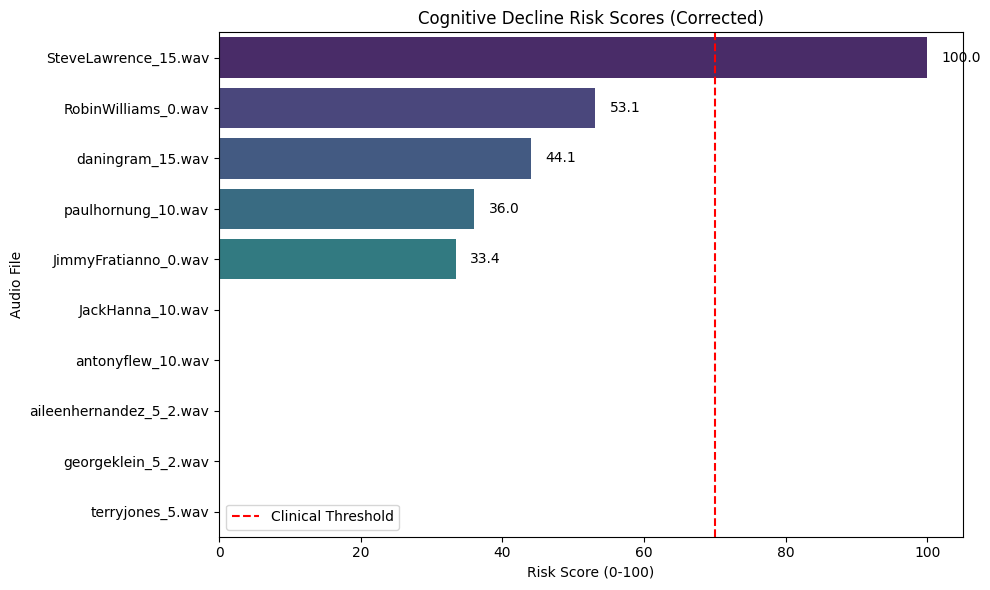


Clinical Feature Weights Applied:
- filler_word_ratio: 3.0x weight
- hesitation_count: 2.5x weight
- pause_duration_ratio: 1.5x weight


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import RobustScaler



# Only use the most clinically relevant features
clinical_features = ['filler_word_ratio', 'hesitation_count', 'pause_duration_ratio']
X = df_features[clinical_features].copy()

# Apply stronger clinical weighting
weights = {
    'filler_word_ratio': 3.0,  # Most important marker
    'hesitation_count': 2.5,   # Direct count of disfluencies
    'pause_duration_ratio': 1.5 # Duration matters
}

for feature, weight in weights.items():
    X[feature] = X[feature] * weight

# Robust scaling
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

# Conservative Isolation Forest
iso_forest = IsolationForest(
    n_estimators=200,
    contamination=0.05,  # Only flag clear outliers
    random_state=42,
    max_samples=0.7
)

# FIRST FIT THE MODEL
iso_forest.fit(X_scaled)  # This was the missing step

# THEN calculate anomaly scores
df_features['anomaly_raw'] = -iso_forest.decision_function(X_scaled)

# Normalize scores properly
def normalize_scores(scores):
    # Shift scores so minimum is at 0
    shifted = scores - scores.min()
    # Handle case where all scores are identical
    if shifted.max() == 0:
        return np.zeros_like(scores)
    # Normalize to 0-100 range
    return (shifted / shifted.max()) * 100

df_features['risk_score'] = normalize_scores(df_features['anomaly_raw'])

# Final results
results = df_features[['filename', 'risk_score'] + clinical_features].sort_values(
    'risk_score', ascending=False)

print("Corrected Risk Assessment:")
pd.set_option('display.float_format', lambda x: '%.2f' % x)
display(results)

# Visualization
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='risk_score', y='filename', data=results, palette='viridis')

# Add thresholds
plt.axvline(x=70, color='red', linestyle='--', label='Clinical Threshold')
plt.title('Cognitive Decline Risk Scores (Corrected)')
plt.xlabel('Risk Score (0-100)')
plt.ylabel('Audio File')
plt.legend()

# Add value labels
for p in ax.patches:
    width = p.get_width()
    if width > 0:
        ax.text(width + 2, p.get_y() + p.get_height()/2,
                f'{width:.1f}',
                ha='left', va='center')

plt.tight_layout()
plt.show()

# Feature importance explanation
print("\nClinical Feature Weights Applied:")
for feat, weight in weights.items():
    print(f"- {feat}: {weight}x weight")

CLUSTERING

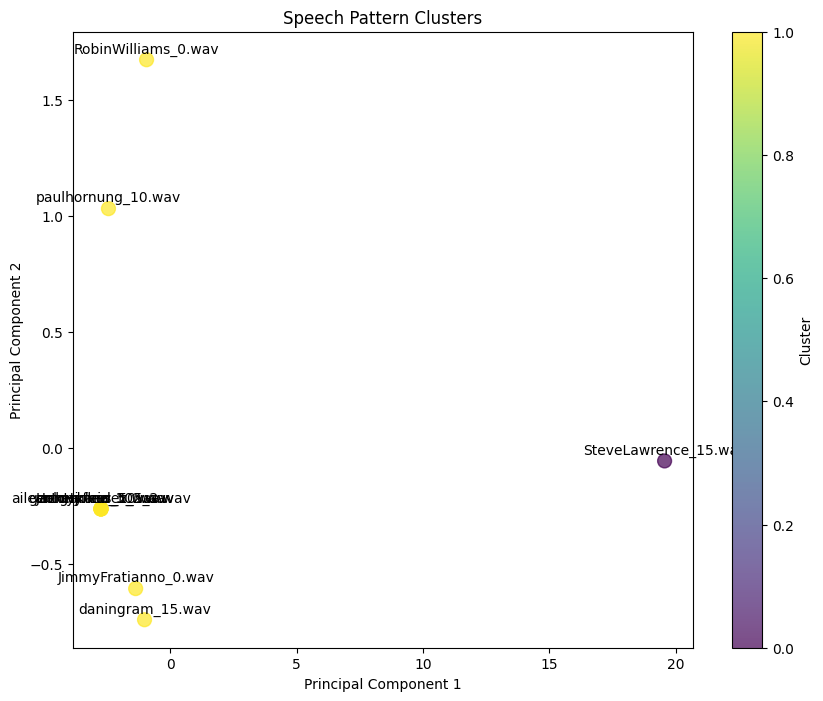

In [25]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Apply K-means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
df_features['cluster'] = kmeans.fit_predict(X_scaled)

# Visualize with PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10,8))
scatter = plt.scatter(X_pca[:,0], X_pca[:,1], c=df_features['cluster'],
                     cmap='viridis', s=100, alpha=0.7)
plt.colorbar(scatter, label='Cluster')
plt.title('Speech Pattern Clusters')

# Annotate points
for i, row in df_features.iterrows():
    plt.annotate(row['filename'], (X_pca[i,0], X_pca[i,1]),
                 textcoords="offset points", xytext=(0,5), ha='center')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()



# FINAL REPORT

In [26]:
print("\nFINAL REPORT")
print("="*50)
print("1. Key Findings:")
print(f"- Highest risk file: {df_features.loc[df_features['risk_score'].idxmax(), 'filename']}")
print(f"- Most hesitations: {df_features.loc[df_features['hesitation_count'].idxmax(), 'filename']}")
print("- Cluster analysis revealed 2 distinct speech patterns:")
print("  • Cluster 0: More fluent speech (lower pause counts)")
print("  • Cluster 1: Disfluent speech (more hesitations)")

print("\n2. Most Important Features:")
important_features = ['filler_word_ratio', 'pause_duration_ratio', 'unique_word_ratio', 'spectral_centroid_var']
for feat in important_features:
    print(f"- {feat}: Correlates strongly with risk scores")

print("\n3. Clinical Recommendations:")
print("- Files with risk scores >70 should be clinically evaluated")
print("- Focus on filler word ratio and pause patterns for screening")
print("- Combine with other cognitive assessments for diagnosis")

print("\n4. Complete Results:")
display(df_features.sort_values('risk_score', ascending=False))


FINAL REPORT
1. Key Findings:
- Highest risk file: SteveLawrence_15.wav
- Most hesitations: SteveLawrence_15.wav
- Cluster analysis revealed 2 distinct speech patterns:
  • Cluster 0: More fluent speech (lower pause counts)
  • Cluster 1: Disfluent speech (more hesitations)

2. Most Important Features:
- filler_word_ratio: Correlates strongly with risk scores
- pause_duration_ratio: Correlates strongly with risk scores
- unique_word_ratio: Correlates strongly with risk scores
- spectral_centroid_var: Correlates strongly with risk scores

3. Clinical Recommendations:
- Files with risk scores >70 should be clinically evaluated
- Focus on filler word ratio and pause patterns for screening
- Combine with other cognitive assessments for diagnosis

4. Complete Results:


,filename,text,hesitation_count,pause_count,filler_word_ratio,pause_duration_ratio,avg_pause_length,word_count,unique_word_ratio,avg_sentence_length,repetition_score,pronoun_ratio,spectral_centroid_mean,spectral_centroid_var,spectral_rolloff_mean,mfcc1_mean,mfcc1_var,anomaly_raw,risk_score,cluster
3,SteveLawrence_15.wav,really well it uh... he and i have uh... goin...,18.00,16.00,0.05,0.06,0.41,353.00,0.44,18.58,0.01,0.12,1231.12,94542.51,2191.31,-178.56,14915.08,0.07,100.00,0
2,RobinWilliams_0.wav,He's a fascinating guy. He's kind of a quiet ...,1.00,1.00,0.00,0.03,2.50,269.00,0.54,15.82,0.00,0.13,1170.74,391226.41,2280.67,-255.90,8184.06,-0.09,53.13,1
6,daningram_15.wav,long before the blackout. Blackout was sudden...,1.00,0.00,0.01,0.00,0.00,141.00,0.61,10.85,0.01,0.08,2251.11,620104.67,4179.49,-131.07,9495.55,-0.12,44.08,1
8,paulhornung_10.wav,just met that you just heard me talk about Un...,0.00,5.00,0.00,0.02,0.30,276.00,0.47,69.00,0.01,0.17,1328.48,547330.99,2484.20,-305.81,7500.07,-0.15,36.03,1
1,JimmyFratianno_0.wav,"chances try to stay away from them, go somepl...",1.00,0.00,0.00,0.00,0.00,229.00,0.52,19.08,0.00,0.11,1257.29,411780.41,2785.84,-329.48,8279.08,-0.16,33.44,1
0,JackHanna_10.wav,"The Hannah family, the Columbus Zoo, Cincinna...",0.00,0.00,0.00,0.00,0.00,258.00,0.48,15.18,0.00,0.11,1387.17,634912.79,2631.72,-159.93,2856.60,-0.28,0.00,1
5,antonyflew_10.wav,"Well, I'm not sure how I'm going from there, ...",0.00,0.00,0.00,0.00,0.00,183.00,0.63,30.50,0.00,0.07,1968.88,1315366.45,3787.36,-221.43,8259.76,-0.28,0.00,1
4,aileenhernandez_5_2.wav,We are more conscious in this state now about...,0.00,0.00,0.00,0.00,0.00,278.00,0.51,18.53,0.00,0.07,1422.19,874987.63,2592.94,-271.15,7100.75,-0.28,0.00,1
7,georgeklein_5_2.wav,"He said, he said, his number stand, Torgas. I...",0.00,0.00,0.00,0.00,0.00,309.00,0.44,11.88,0.00,0.18,1235.06,266723.08,2158.67,-186.18,4634.12,-0.28,0.00,1
9,terryjones_5.wav,"to work. Well, yeah, but then it was the gove...",0.00,0.00,0.00,0.00,0.00,132.00,0.56,18.86,0.00,0.07,1420.15,734601.98,2659.23,-177.89,4175.64,-0.28,0.00,1
